<a href="https://colab.research.google.com/github/yeeoonoo/ds-section1-project/blob/main/section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [3]:
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


##1. EDA

가. 'Unnamed: 0'라는 컬럼은 필요 없는 정보이므로 컬럼 삭제

In [4]:
df.drop(['Unnamed: 0'], axis =1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


나. 중복값 확인 및 제거

In [6]:
df.duplicated().sum()

1

In [7]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16593,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16594,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16595,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [8]:
df.duplicated(subset='Name').sum()

5104

본 데이터셋의 키값이라 볼 수 있는 'Name'컬럼의 내용이 중복값이 아주 많음\
게임 플랫폼 컬럼이 따로 있는 것으로 보아, 같은 게임이 여러 플랫폼으로 출시했을 가능성이 높음

In [9]:
df[df['Name'] == 'Bejeweled 3']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2710,Bejeweled 3,PC,2010.0,Puzzle,PopCap Games,0.02,0.05,0,0.01
4608,Bejeweled 3,PS3,NaN,Puzzle,Unknown,0.13,0,0,0.01
10268,Bejeweled 3,DS,NaN,Puzzle,Unknown,0.32,0.02,0,0.03
16431,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01


In [10]:
df[df['Name'] == 'LEGO Batman: The Videogame']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3347,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0,0.29
3775,LEGO Batman: The Videogame,DS,2008.0,Action,Warner Bros. Interactive Entertainment,1.79,1.06,0,0.29
4815,LEGO Batman: The Videogame,PC,2008.0,Action,Warner Bros. Interactive Entertainment,0.02,0.03,0,0.01
5592,LEGO Batman: The Videogame,X360,2008.0,Action,Warner Bros. Interactive Entertainment,2.03,1.03,0,0.32
5849,LEGO Batman: The Videogame,PS3,2008.0,Action,Warner Bros. Interactive Entertainment,0.72,0.42,0,0.19
9640,LEGO Batman: The Videogame,PS2,2008.0,Action,Warner Bros. Interactive Entertainment,0.72,0.03,0,0.52
9957,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,0.57,0.46,0,0.28


In [11]:
df[df['Name'] == 'Dragon Ball Z: Ultimate Tenkaichi']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4545,Dragon Ball Z: Ultimate Tenkaichi,X360,2011.0,NaN,Namco Bandai Games,0.39,0.1,0.01,0.04
8434,Dragon Ball Z: Ultimate Tenkaichi,PS3,2011.0,Fighting,Namco Bandai Games,0.27,0.18,0.09,0.08


위 데이터처럼, 같은 게임이 다양한 플랫폼으로 출시되었음을 알 수 있음\
그리고 년도나 장르 등 다른 컬럼의 결측치를 채울 수 있을 것으로 보임

따라서, 결측치를 제거 및 대체하는데 있어
1.   게임 이름이 유일한 데이터
2.   게임 이름이 중복되는(여러 플랫폼 출시) 데이터
3.   게임 이름은 중복되나 결측치 정보를 찾을 수 없는 데이터

로 경우를 나누어 결측치 제거 및 대체가 진행되어야 할 것으로 보임\
또 데이터 수가 방대하기 때문에, 우리의 목표인 총 판매량 50만장 달성에 부합하는 데이터만 정제하여 보기로 함\
이를 위해 총 판매량을 나타내는 'Total_Sales'컬럼 생성하고자 함.


우선 각 지역의 판매량을 모두 합산한 값을 'Total_Sales'에 저장한 후,\
전체 판매량이 높은 게임을 대상으로 플랫폼 및 기타 컬럼의 데이터 확인하기로 함

가) 지역별 출고량을 나타내는 컬럼에 'M', 'K'같은 숫자 이외의 문자 확인됨\
→ 'M'은 백만단위를 나타낸 것으로, 다른 값들이 백만단위로 작성된 것으로 보아 'M' 제거\
→ 'K'는 천 단위를 나타낸 것으로, 다른 값들과 비교하여 제거 후 단위 맞춰주고자 함


먼저 'NA_Sales'컬럼의 'M'이 포함된 행을 찾아 제거해줌

In [12]:
df_NA = df[df['NA_Sales'].str.contains('M')]
df_NA = df_NA['NA_Sales'].str.replace('M','')
df_NA.index
df.loc[df_NA.index, 'NA_Sales'] = df_NA

In [13]:
df[df['NA_Sales'].str.contains('M')] #'M'이 포함된 행 없음 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


같은 방식으로 나머지 3개의 컬럼도 적용

In [14]:
df_EU = df[df['EU_Sales'].str.contains('M')]
df_EU = df_EU['EU_Sales'].str.replace('M','')
df_EU.index
df.loc[df_EU.index, 'EU_Sales'] = df_EU

In [15]:
df_JP = df[df['JP_Sales'].str.contains('M')]
df_JP = df_JP['JP_Sales'].str.replace('M','')
df_JP.index
df.loc[df_JP.index, 'JP_Sales'] = df_JP

In [16]:
df_Oth = df[df['Other_Sales'].str.contains('M')]
df_Oth = df_Oth['Other_Sales'].str.replace('M','')
df_Oth.index
df.loc[df_Oth.index, 'Other_Sales'] = df_Oth

In [17]:
df[(df['EU_Sales'].str.contains('M')) | (df['JP_Sales'].str.contains('M')) | (df['Other_Sales'].str.contains('M'))] #'M'이 포함된 행 없음 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


나) 이어서 Sales컬럼들의 'K'가 포함된 행을 찾아 제거, 백만단위로 값을 맞춰줌

In [18]:
df_NA_K = df[df['NA_Sales'].str.contains('K')]
df_NA_K = df_NA_K['NA_Sales'].str.replace('K','')
df_NA_K = df_NA_K.astype(float)
df_NA_K = df_NA_K /1000
df_NA_K.index
df.loc[df_NA_K.index, 'NA_Sales'] = df_NA_K

In [19]:
df_EU_K = df[df['EU_Sales'].str.contains('K')]
df_EU_K = df_EU_K['EU_Sales'].str.replace('K','')
df_EU_K = df_EU_K.astype(float)
df_EU_K = df_EU_K /1000
df_EU_K.index
df.loc[df_EU_K.index, 'EU_Sales'] = df_EU_K

In [20]:
df_JP_K = df[df['JP_Sales'].str.contains('K')]
df_JP_K = df_JP_K['JP_Sales'].str.replace('K','')
df_JP_K = df_JP_K.astype(float)
df_JP_K = df_JP_K /1000
df_JP_K.index
df.loc[df_JP_K.index, 'JP_Sales'] = df_JP_K

In [21]:
df_Oth_K = df[df['Other_Sales'].str.contains('K')]
df_Oth_K = df_Oth_K['Other_Sales'].str.replace('K','')
df_Oth_K = df_Oth_K.astype(float)
df_Oth_K = df_Oth_K /1000
df_Oth_K.index
df.loc[df_Oth_K.index, 'Other_Sales'] = df_Oth_K

In [22]:
df[(df['NA_Sales'].str.contains('K')) | (df['EU_Sales'].str.contains('K')) | (df['JP_Sales'].str.contains('K')) | (df['Other_Sales'].str.contains('K'))] #'K' 포함된 행 없음 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


이제 각 지역 판매량 컬럼의 데이터타입을 실수형으로 조정한 후,\
전체 합산한 값을 'Total_Sales'컬럼에 저장함

In [23]:
df['NA_Sales'] = df['NA_Sales'].astype(float)
df['EU_Sales'] = df['EU_Sales'].astype(float)
df['JP_Sales'] = df['JP_Sales'].astype(float)
df['Other_Sales'] = df['Other_Sales'].astype(float)

In [24]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

###결측치 제거 및 대체
우선 전체 결측치 수와 'Year'컬럼 결측치 확인

In [25]:
df.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Total_Sales      0
dtype: int64

In [26]:
df[df['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.00,0.00,0.02,0.00,0.02
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0.00,0.06,0.00,0.01,0.07
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0.00,0.00,0.00,0.03
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0.00,0.00,0.17,0.03,0.20
...,...,...,...,...,...,...,...,...,...,...
16239,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16274,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
16277,Madden NFL 11,Wii,NaN,Sports,Unknown,0.70,0.00,0.00,0.05,0.75
16424,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0.00,0.00,0.00,0.06


1) Year 컬럼의 결측치를 포함한 행을 추출해봤을때, Publisher 컬럼에 결측치 이외에도 'Unknown'이라는 값이 있음.\
→ 이에 Publisher 컬럼의 'Unknown'을 결측치로 대체한 후, 같은 게임의 다른 플랫폼 데이터에서 값을 찾아 채워주기로 함

In [27]:
df[df.iloc[:,:] == 'Unknown'] = np.NaN

In [28]:
df.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher      261
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Total_Sales      0
dtype: int64

**Pubilsher 컬럼 결측치가 Unknown 수만큼 늘어난 것을 확인**

새롭게 생성된 총 판매량 데이터를 기준으로 데이터 정리하고자 함\
우리는 총 판매량 최소 50만장을 기준으로 삼음 ('Total_Sales' 컬럼의 0.5) 

1.   게임 이름이 유일한 데이터에서 총 판매량 50만장 미만의 데이터를 제거\
     50만장 이상의 데이터 최대한 보존
2.   게임 이름이 중복되는 경우, 전체 플랫폼 도합 50만장 미만의 데이터를 제거\
     50만장 이상의 데이터 최대한 보존


먼저 게임 이름이 유일한 데이터 검색

In [29]:
temp = {k: v for k, v in df['Name'].value_counts().items() if v==1}
df_uniq = df[df['Name'].isin(list(temp.keys()))]

In [30]:
df_uniq_up = df_uniq[df_uniq['Total_Sales'] >= 0.5]
df_uniq_drop = df_uniq[df_uniq['Total_Sales'] < 0.5]

In [31]:
df_uniq_up['Year'].isnull().sum()

14

'Year'컬럼 결측치인 데이터 갯수가 14개밖에 되지 않으므로, 직접 검색하여 데이터 입력함

In [32]:
df_uniq_yr_na = df_uniq_up[df_uniq_up['Year'].isnull()]
df_uniq_yr_na

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3031,Donkey Kong Land III,GB,NaN,Platform,Nintendo,0.68,0.31,0.00,0.04,1.03
3562,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
3942,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,0.58,0.40,0.00,0.07,1.05
5144,Yakuza 4,PS3,NaN,Action,Sega,0.15,0.14,0.63,0.05,0.97
5720,Adventure,2600,NaN,Adventure,Atari,1.21,0.08,0.00,0.01,1.30
6575,Fishing Derby,2600,NaN,Sports,Activision,0.48,0.03,0.00,0.01,0.52
10083,Advance Wars: Days of Ruin,DS,NaN,Strategy,Nintendo,0.44,0.13,0.00,0.06,0.63
11308,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
11315,Air-Sea Battle,2600,NaN,Shooter,Atari,0.91,0.06,0.00,0.01,0.98
12389,WarioWare: Twisted!,GBA,NaN,Puzzle,NaN,0.16,0.06,0.50,0.02,0.74


In [33]:
df_uniq_up.loc[df_uniq_yr_na.index, 'Year'] = [1997, 2005, 1999, 2010, 1980, 1980, 2008, 1998, 1977, 2004, 2001, 2006, 2002, 1977]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


장르와 퍼블리셔도 마찬가지 작업 수행

In [34]:
df['Genre'].value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1307
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

In [35]:
df_uniq_gnr_na = df_uniq_up[df_uniq['Genre'].isnull()]
df_uniq_gnr_na

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05,0.70
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0.00,0.04,0.00,0.57,0.61
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5.17,4.05,4.34,0.79,14.35
4598,Wii Party,Wii,2010.0,NaN,Nintendo,1.79,3.53,2.49,0.68,8.49
5668,Chrono Cross,PS,1999.0,NaN,SquareSoft,0.62,0.42,0.69,0.12,1.85
9487,Final Fantasy XII,PS2,2006.0,NaN,Square Enix,1.88,0.00,2.33,1.74,5.95
11062,Yakuza 3,PS3,2009.0,NaN,Sega,0.21,0.21,0.62,0.08,1.12
11495,F-Zero X,N64,1998.0,NaN,Nintendo,0.45,0.33,0.29,0.03,1.10
12330,Onimusha: Warlords,PS2,2001.0,NaN,Virgin Interactive,0.99,0.48,1.09,0.14,2.70
15425,"WarioWare, Inc.: Mega Party Game$",GC,2003.0,NaN,Nintendo,0.20,0.05,0.44,0.02,0.71


In [36]:
df_uniq_up.loc[df_uniq_gnr_na.index, 'Genre'] = ['Sports', 'Action', 'Role-Playing', 'Misc', 'Role-Playing', 'Role-Playing', 'Action', 'Racing', 'Action', 'Misc', 'Action']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [37]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Game Arts                          1
Max Five                           1
CCP                                1
Quelle                             1
Just Flight                        1
Name: Publisher, Length: 577, dtype: int64

In [38]:
df_uniq_pub_na = df_uniq_up[df_uniq['Publisher'].isnull()]
df_uniq_pub_na

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
605,God Eater,PSP,2010.0,Action,NaN,0.00,0.00,0.72,0.00,0.72
1961,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3562,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
4007,The Game of Life,PS,1998.0,Misc,NaN,0.46,0.31,0.00,0.05,0.82
7818,RIFT,PC,2011.0,Role-Playing,NaN,0.44,0.16,0.00,0.07,0.67
8236,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.94
9485,Gran Turismo Concept 2001 Tokyo,PS2,2001.0,Racing,NaN,0.00,1.10,0.42,0.33,1.85
11308,Triple Play 99,PS,1998.0,Sports,NaN,0.81,0.55,0.00,0.10,1.46
12389,WarioWare: Twisted!,GBA,2004.0,Puzzle,NaN,0.16,0.06,0.50,0.02,0.74
12899,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64


In [39]:
df_uniq_up.loc[df_uniq_pub_na.index, 'Publisher'] = ['Namco Bandai Games', 'Majesco', 'THQ', 'Hasbro', 'Trion Worlds', 'SCEA', 'Sony Computer Entertainment', 'Electronic Arts', 'Nintendo', 'Majesco', 'Konami Digital Entertainment', 'Majesco', 'Majesco']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [40]:
df_uniq_up.isnull().sum() #총 판매량 0.5 상회, 유일한 게임 이름의 데이터 결측치 없음 확인

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

이제 게임 이름이 유일한 데이터 중, 총 판매량이 50만장에 못 미치는 데이터 검색\
→ 데이터를 결측치로 만들어 전체 행 제거 예정

In [41]:
df_uniq_drop

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.0,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.0,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.0,0.00,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.0,0.14,0.00,0.14
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.0,0.11,0.01,0.19
...,...,...,...,...,...,...,...,...,...,...
16585,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000.0,Sports,Konami Digital Entertainment,0.00,0.0,0.08,0.01,0.09
16588,Namco Soccer Prime Goal,PS,1995.0,Sports,Sony Computer Entertainment,0.00,0.0,0.12,0.01,0.13
16589,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0.00,0.0,0.05,0.00,0.05
16591,Minna no Chizu 2,PSP,2007.0,Misc,Zenrin,0.00,0.0,0.02,0.00,0.02


In [42]:
df_uniq_drop.loc[:,:] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


df_uniq_up를 df에 병합함으로써 게임이름이 유일한 데이터 중 총 판매량이 0.5를 상회하는 데이터들의 결측치 제거\
df_uniq_drop을 df에 병합함으로써 게임이름이 유일한 데이터 중 총 판매량이 0.5에 못 미치는 데이터 제거

In [43]:
df.loc[df_uniq_up.index] = df_uniq_up
df.loc[df_uniq_drop.index] = df_uniq_drop

In [44]:
#게임이름이 유일한 데이터 중 총 판매량이 0.5에 못 미치는 데이터 제거
df = df.dropna(subset=['Name'])

In [45]:
df.isnull().sum()

Name             0
Platform         0
Year           147
Genre           20
Publisher       89
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Total_Sales      0
dtype: int64

이제 게임 이름이 중복되는 데이터의 결측치를 채우고자 함\
우선 게임 이름순으로 정렬, 인덱스 재부여함

In [46]:
df = df.sort_values(['Name', 'Year'], ascending = True)
df_sort_name = df.set_index('Name')
df_sort_name

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
.hack//Infection Part 1,PS2,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26
.hack//Mutation Part 2,PS2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.67
007 Racing,PS,2000.0,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53
007: Quantum of Solace,PS2,2008.0,Action,Activision,0.17,0.00,0.00,0.26,0.43
007: Quantum of Solace,Wii,2008.0,Action,Activision,0.30,0.29,0.01,0.07,0.67
...,...,...,...,...,...,...,...,...,...
pro evolution soccer 2011,PS2,2010.0,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11,0.41
uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0.00,0.20,2.45
uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0.00,0.00,0.02


게임이름으로 데이터를 그룹핑한 후 'Total_Sales' 값이 0.5에 못 미치는 데이터를 모두 제거하도록 함

In [47]:
group_name = df_sort_name.groupby('Name').sum()
group_name_drop = group_name[group_name['Total_Sales'] < 0.5]

In [48]:
group_name_drop = group_name_drop.index

In [49]:
group_name_drop

Index(['11eyes: CrossOver', '187: Ride or Die',
       '3rd Super Robot Wars Z Jigoku Hen',
       '3rd Super Robot Wars Z: Tengoku-Hen', '428: Fuusa Sareta Shibuya de',
       '4x4 EVO 2', '50 Cent: Blood on the Sand', '7 Days to Die',
       '7 Wonders of the Ancient World', 'AKB1/149: Love Election',
       ...
       'Zathura', 'Zero Escape: Zero Time Dilemma', 'Zombie Army Trilogy',
       'Zoo Hospital', 'Zoo Tycoon (2013)', 'ZooCube', 'Zumba Fitness Core',
       'iCarly 2: iJoin The Click!', 'nail'd', 'uDraw Studio: Instant Artist'],
      dtype='object', name='Name', length=1146)

In [50]:
for x in group_name_drop:
  df_sort_name.loc[x, :] = np.nan

In [51]:
#게임이름이 중복인 데이터 중 총 판매량이 0.5에 못 미치는 데이터 제거(여기서는 플랫폼 값을 기준으로 drop)
df_sort_name = df_sort_name.dropna(subset=['Platform'])
df_sort_name

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,,
.hack//Infection Part 1,PS2,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26
.hack//Mutation Part 2,PS2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.67
007 Racing,PS,2000.0,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53
007: Quantum of Solace,PS2,2008.0,Action,Activision,0.17,0.00,0.00,0.26,0.43
007: Quantum of Solace,Wii,2008.0,Action,Activision,0.30,0.29,0.01,0.07,0.67
...,...,...,...,...,...,...,...,...,...
pro evolution soccer 2011,PSP,2010.0,Sports,Konami Digital Entertainment,0.05,0.30,0.29,0.16,0.80
pro evolution soccer 2011,Wii,2010.0,Sports,Konami Digital Entertainment,0.08,0.10,0.03,0.02,0.23
pro evolution soccer 2011,PS2,2010.0,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11,0.41


In [52]:
#결측치 줄어든 것 확인
df_sort_name.isnull().sum()

Platform        0
Year           94
Genre          12
Publisher      39
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Total_Sales     0
dtype: int64

남은 결측치들은 게임 이름이 같은 데이터들인데, 모든 데이터들이 게임이름을 기준으로 정렬되어 있고, 결측치는 가장 하단에 위치함\
→ 결측치를 같은 열의 위의 값으로 채우기로 함

In [53]:
df_sort_name = df_sort_name.ffill()

In [54]:
#결측치 제거 및 대체 완료
df_sort_name.isnull().sum()

Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

In [55]:
df = df_sort_name.reset_index()
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,.hack//Infection Part 1,PS2,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26
1,.hack//Mutation Part 2,PS2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.67
2,007 Racing,PS,2000.0,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53
3,007: Quantum of Solace,PS2,2008.0,Action,Activision,0.17,0.00,0.00,0.26,0.43
4,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.30,0.29,0.01,0.07,0.67
...,...,...,...,...,...,...,...,...,...,...
6888,pro evolution soccer 2011,PSP,2010.0,Sports,Konami Digital Entertainment,0.05,0.30,0.29,0.16,0.80
6889,pro evolution soccer 2011,Wii,2010.0,Sports,Konami Digital Entertainment,0.08,0.10,0.03,0.02,0.23
6890,pro evolution soccer 2011,PS2,2010.0,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11,0.41
6891,uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0.00,0.20,2.45


결측치 제거 과정 중, 년도 값에 이상치 발견함.
이상치 수정 후 데이터타입을 정수형으로 바꾸고자 함.

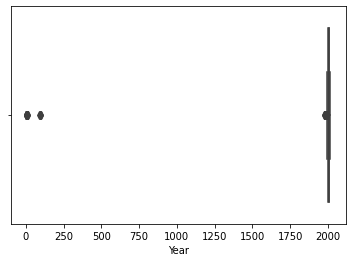

In [56]:
sns.boxplot(x=df.Year);

In [57]:
a = 20

In [58]:
year_correct = []

for x in df['Year']:
  if x < 30:
    x = round(x + 2000)
    year_correct.append(x)
  elif x < 250:
    x = round(x + 1900)
    year_correct.append(x)
  else:
    x = round(x)
    year_correct.append(x)

In [59]:
df['Year'] = year_correct
df.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,.hack//Infection Part 1,PS2,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26
1,.hack//Mutation Part 2,PS2,2002,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.67
2,007 Racing,PS,2000,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53
3,007: Quantum of Solace,PS2,2008,Action,Activision,0.17,0.00,0.00,0.26,0.43
4,007: Quantum of Solace,Wii,2008,Action,Activision,0.30,0.29,0.01,0.07,0.67
5,007: Quantum of Solace,PS3,2008,Action,Activision,0.43,0.52,0.02,0.20,1.17
6,007: Quantum of Solace,PC,2008,Action,Activision,0.01,0.01,0.00,0.00,0.02
7,007: Quantum of Solace,DS,2008,Action,Activision,0.11,0.01,0.00,0.01,0.13
8,007: Quantum of Solace,X360,2008,Action,Activision,0.82,0.52,0.01,0.14,1.49
9,007: The World is not Enough,N64,2000,Action,Electronic Arts,1.13,0.38,0.02,0.03,1.56


In [60]:
#'Year'컬럼 데이터 이상치 없음 확인
df['Year'].describe()

count    6893.000000
mean     2006.336283
std         6.045322
min      1977.000000
25%      2003.000000
50%      2007.000000
75%      2010.000000
max      2016.000000
Name: Year, dtype: float64

In [61]:
#'Year'컬럼 데이터 정수형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6893 non-null   object 
 1   Platform     6893 non-null   object 
 2   Year         6893 non-null   int64  
 3   Genre        6893 non-null   object 
 4   Publisher    6893 non-null   object 
 5   NA_Sales     6893 non-null   float64
 6   EU_Sales     6893 non-null   float64
 7   JP_Sales     6893 non-null   float64
 8   Other_Sales  6893 non-null   float64
 9   Total_Sales  6893 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 538.6+ KB


In [62]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,.hack//Infection Part 1,PS2,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26
1,.hack//Mutation Part 2,PS2,2002,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.67
2,007 Racing,PS,2000,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53
3,007: Quantum of Solace,PS2,2008,Action,Activision,0.17,0.00,0.00,0.26,0.43
4,007: Quantum of Solace,Wii,2008,Action,Activision,0.30,0.29,0.01,0.07,0.67
...,...,...,...,...,...,...,...,...,...,...
6888,pro evolution soccer 2011,PSP,2010,Sports,Konami Digital Entertainment,0.05,0.30,0.29,0.16,0.80
6889,pro evolution soccer 2011,Wii,2010,Sports,Konami Digital Entertainment,0.08,0.10,0.03,0.02,0.23
6890,pro evolution soccer 2011,PS2,2010,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11,0.41
6891,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.45


###주 분석 내용

1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

**1. 지역에 따라서 선호하는 게임 장르가 다를까**

→ 각 지역 판매량을 기준으로 게임이름, 플랫폼 관련없이 판매량과 장르만 보기로 함\
→ 연도를 고려하지 않은 이유 : 게임의 출시년도와 관계없이 재미있다면 사람들은 계속하여 소비한다.\
→ 플랫폼을 고려하지 않은 이유 : 위와 같은 맥락에서 고려하지 않기로 함.


In [63]:
df_Genre_Sales = df.groupby('Genre').sum()
df_Genre_Sales

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Action,3427699,781.40,487.93,110.93,177.46,1557.72
Adventure,407369,73.87,48.84,16.98,12.09,151.78
Fighting,713726,198.48,91.56,55.53,33.23,378.80
Misc,1194214,339.34,188.68,69.95,65.94,663.91
Platform,967635,416.83,190.33,119.88,48.51,775.55
Puzzle,246223,96.18,40.84,45.03,9.72,191.77
Racing,1195121,314.68,214.60,49.55,71.00,649.83
Role-Playing,1025298,288.17,172.47,284.07,52.94,797.65
Shooter,1422929,544.34,297.41,27.31,98.08,967.14


In [64]:
pal = {'Action' : '#EC91B4', 'Sports' : '#EC9B91', 'Shooter' : '#ECC991', 'Role-Playing' : '#E2EC91', 'Platform' : '#B4EC91', 'Misc' : '#91ECCA', 'Racing' : '#91E1EC', 'Fighting' : '#91B3EC', 'Simulation' : '#9C91EC', 'Puzzle' : '#CA91EC', 'Adventure' : '#EC91E1', 'Strategy' : '#FBB8EC'}

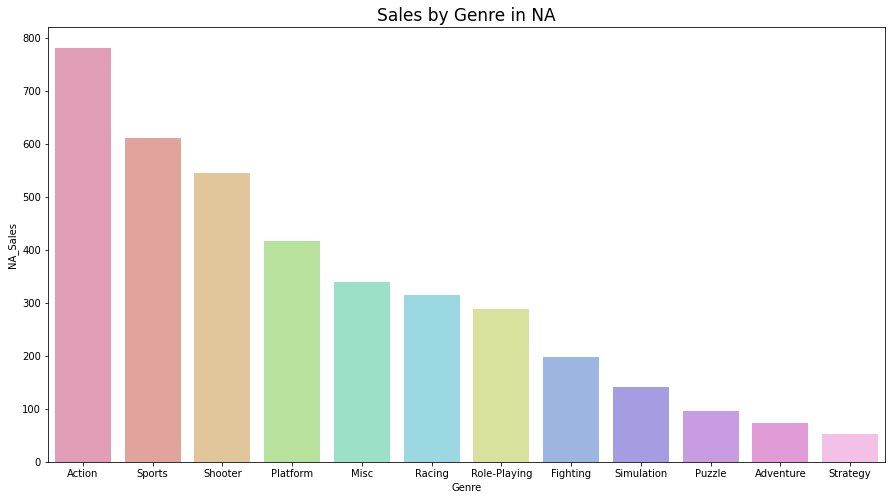

In [65]:
Genre_Sales_NA = df_Genre_Sales.sort_values('NA_Sales', ascending = False)
plt.figure(figsize = (15,8))
sns.barplot(data=Genre_Sales_NA, x=Genre_Sales_NA.index, y='NA_Sales',
            palette = pal)
plt.title('Sales by Genre in NA', size = 17)
plt.show()

먼저 북미지역 판매량에 따른 게임 장르를 나열해보면,
1. 액션
2. 스포츠
3. 슈팅

순으로 판매량 상위를 차지하는 것을 알 수 있음

In [66]:
Sales_NA_sum = df_Genre_Sales.NA_Sales.sum()
Genre_Sales_NA_ratio = df_Genre_Sales['NA_Sales'] / Sales_NA_sum
Genre_Sales_NA_ratio = Genre_Sales_NA_ratio.sort_values(ascending = False)

In [67]:
Genre_NA_color = []
for x in Genre_Sales_NA_ratio.index:
  color = pal.get(x)
  Genre_NA_color.append(color)

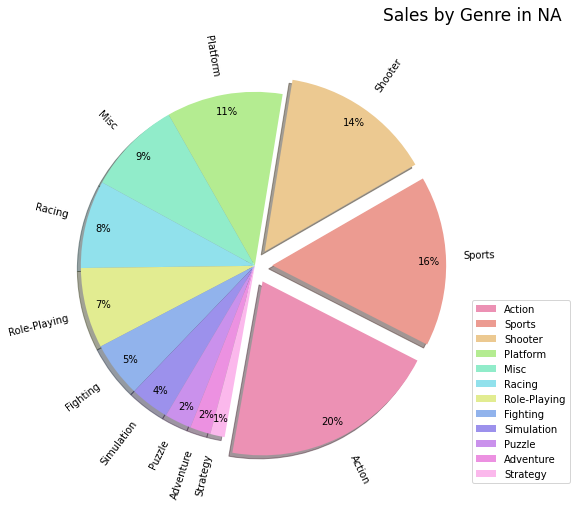

In [68]:
labels = Genre_Sales_NA_ratio.index
colors = Genre_NA_color
explode = [0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.figure(figsize = (15,8))
plt.pie(Genre_Sales_NA_ratio, labels=labels, autopct='%.0f%%', pctdistance=0.9, shadow=True, colors = colors, rotatelabels=True, startangle=260, counterclock=True, explode=explode)
plt.title('Sales by Genre in NA', size = 17, position=(1, 1.0+0.05))
plt.legend(loc=(1.0, 0.0))
plt.show()

상위 3그룹인 액션, 스포츠, 슈팅 장르는 북미지역 총 판매량의 50%에 달하고 있음.

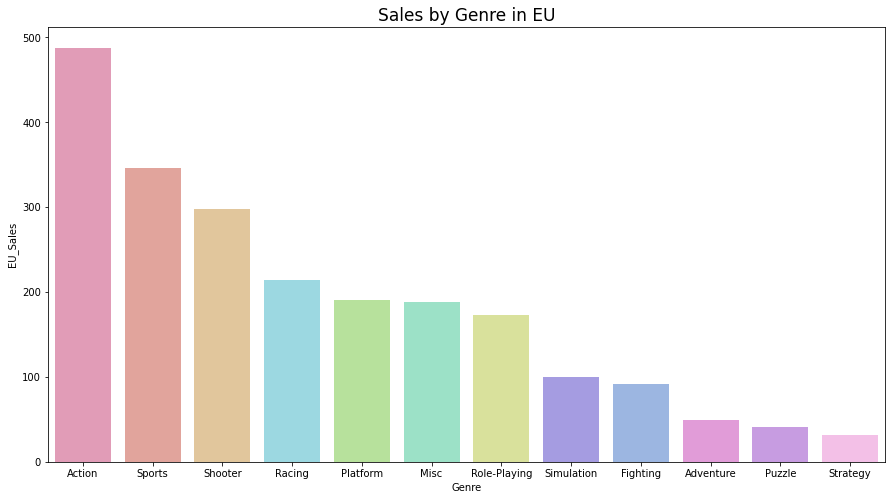

In [69]:
Genre_Sales_EU = df_Genre_Sales.sort_values('EU_Sales', ascending = False)
plt.figure(figsize = (15,8))
sns.barplot(data=Genre_Sales_EU, x=Genre_Sales_EU.index, y='EU_Sales', 
            palette = pal)
plt.title('Sales by Genre in EU', size = 17)
plt.show()

다음 유럽지역 판매량에 따른 게임 장르를 나열해보면,
1. 액션
2. 스포츠
3. 슈팅

순으로 판매량 상위를 차지하는 것을 알 수 있음\
상위 3개 장르는 북미 지역과 동일함.

In [70]:
Sales_EU_sum = df_Genre_Sales.EU_Sales.sum()
Genre_Sales_EU_ratio = df_Genre_Sales['EU_Sales'] / Sales_EU_sum
Genre_Sales_EU_ratio = Genre_Sales_EU_ratio.sort_values(ascending = False)

In [71]:
Genre_EU_color = []
for x in Genre_Sales_EU_ratio.index:
  color = pal.get(x)
  Genre_EU_color.append(color)

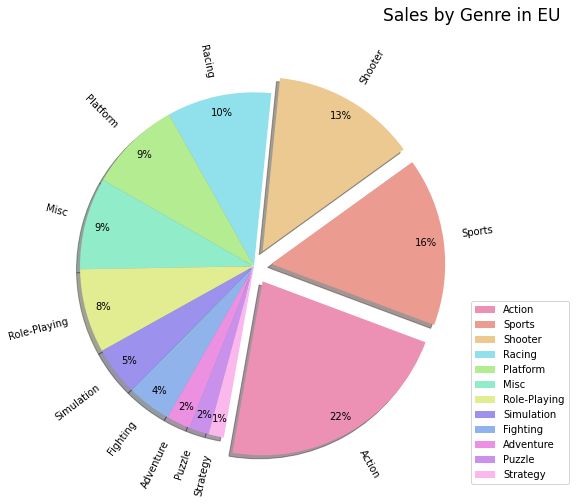

In [72]:
labels = Genre_Sales_EU_ratio.index
colors = Genre_EU_color
explode = [0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.figure(figsize = (15,8))
plt.pie(Genre_Sales_EU_ratio, labels=labels, autopct='%.0f%%', pctdistance=0.9, shadow=True, colors = colors, rotatelabels=True, startangle=260, counterclock=True, explode=explode)
plt.title('Sales by Genre in EU', size = 17, position=(1, 1.0+0.05))
plt.legend(loc=(1.0, 0.0))
plt.show()

상위 3그룹인 액션, 스포츠, 슈팅 장르는 유럽지역 총 판매량의 51%를 차지하고 있음.

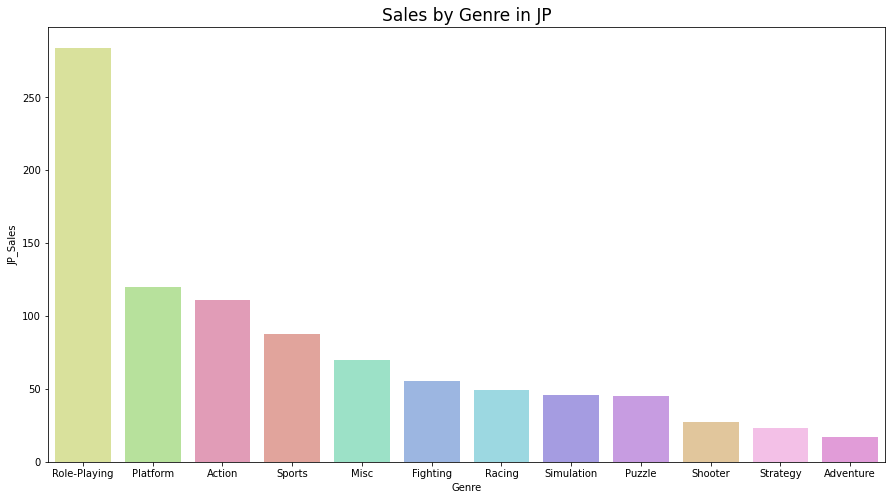

In [73]:
Genre_Sales_JP = df_Genre_Sales.sort_values('JP_Sales', ascending = False)
plt.figure(figsize = (15,8))
sns.barplot(data=Genre_Sales_JP, x=Genre_Sales_JP.index, y='JP_Sales', 
            palette = pal)
plt.title('Sales by Genre in JP', size = 17)
plt.show()

다음 일본지역 판매량에 따른 게임 장르를 나열해보면 기존 결과와 상이한데.
1. 롤플레잉
2. 플랫폼
3. 액션

순으로 판매량 상위를 차지하는 것을 알 수 있음\
롤플레잉 장르가 두각을 나타내고, 나머지 장르들이 팽팽한 점유율을 보이고 있음.

In [74]:
Sales_JP_sum = df_Genre_Sales.JP_Sales.sum()
Genre_Sales_JP_ratio = df_Genre_Sales['JP_Sales'] / Sales_JP_sum
Genre_Sales_JP_ratio = Genre_Sales_JP_ratio.sort_values(ascending = False)

In [75]:
Genre_JP_color = []
for x in Genre_Sales_JP_ratio.index:
  color = pal.get(x)
  Genre_JP_color.append(color)

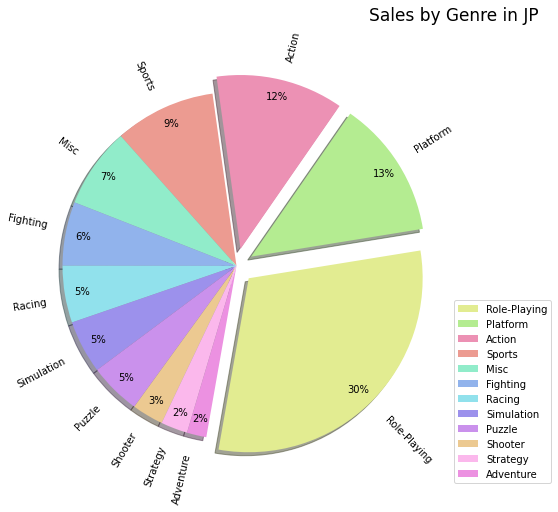

In [76]:
labels = Genre_Sales_JP_ratio.index
colors = Genre_JP_color
explode = [0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.figure(figsize = (15,8))
plt.pie(Genre_Sales_JP_ratio, labels=labels, autopct='%.0f%%', pctdistance=0.9, shadow=True, colors = colors, rotatelabels=True, startangle=260, counterclock=True, explode=explode)
plt.title('Sales by Genre in JP', size = 17, position=(1, 1.0+0.05))
plt.legend(loc=(1.0, 0.0))
plt.show()

상위 3그룹인 롤플레잉, 플랫폼, 액션 장르는 일본지역 총 판매량의 55%를 차지하고 있음.


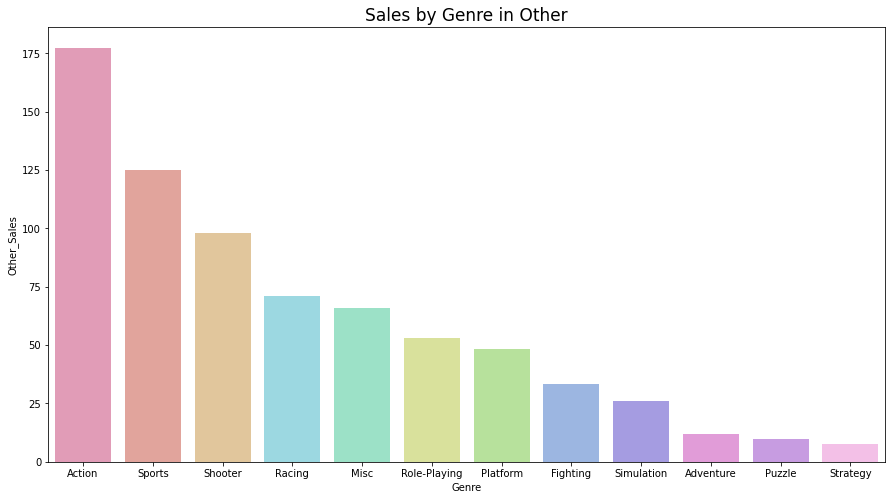

In [77]:
Genre_Sales_Oth = df_Genre_Sales.sort_values('Other_Sales', ascending = False)
plt.figure(figsize = (15,8))
sns.barplot(data=Genre_Sales_Oth, x=Genre_Sales_Oth.index, y='Other_Sales', 
            palette = pal)
plt.title('Sales by Genre in Other', size = 17)
plt.show()

마지막으로 기타지역 판매량에 따른 게임 장르를 나열해보면.
1. 액션
2. 스포츠
3. 슈팅

순으로 판매량 상위를 차지하는 것을 알 수 있음.

In [78]:
Sales_Oth_sum = df_Genre_Sales.Other_Sales.sum()
Genre_Sales_Oth_ratio = df_Genre_Sales['Other_Sales'] / Sales_Oth_sum
Genre_Sales_Oth_ratio = Genre_Sales_Oth_ratio.sort_values(ascending = False)

In [79]:
Genre_Oth_color = []
for x in Genre_Sales_Oth_ratio.index:
  color = pal.get(x)
  Genre_Oth_color.append(color)

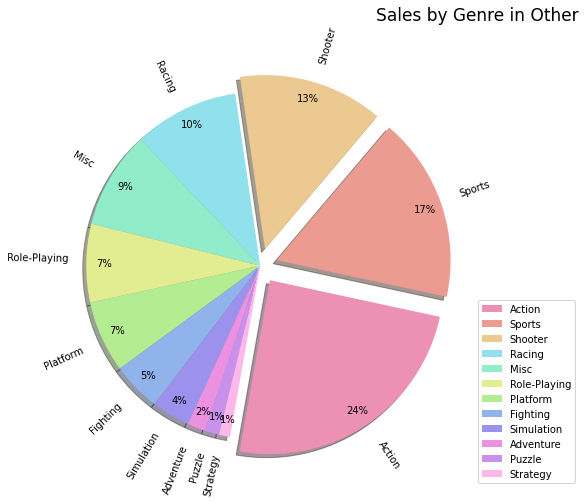

In [80]:
labels = Genre_Sales_Oth_ratio.index
colors = Genre_Oth_color
explode = [0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.figure(figsize = (15,8))
plt.pie(Genre_Sales_Oth_ratio, labels=labels, autopct='%.0f%%', pctdistance=0.9, shadow=True, colors = colors, rotatelabels=True, startangle=260, counterclock=True, explode=explode)
plt.title('Sales by Genre in Other', size = 17, position=(1, 1.0+0.05))
plt.legend(loc=(1.0, 0.0))
plt.show()

상위 3그룹인 액션, 스포츠, 슈팅 장르는 기타지역 총 판매량의 54%를 차지하고 있음.

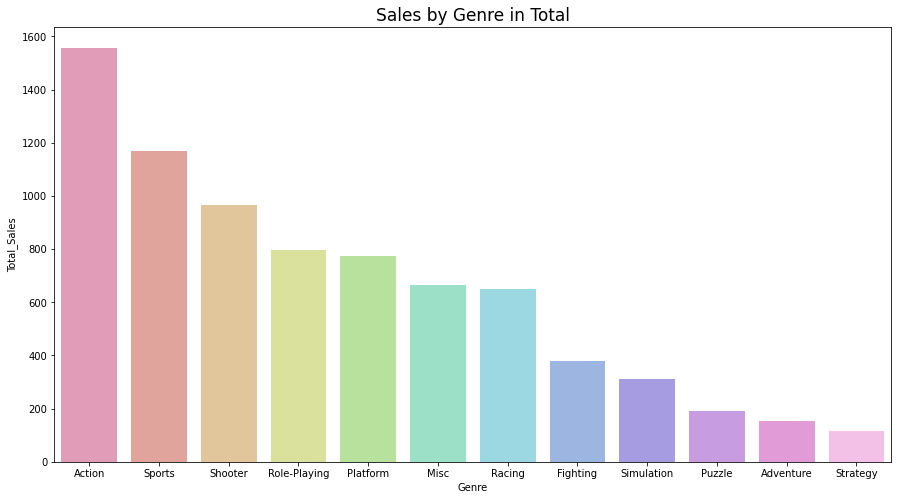

In [81]:
df_Genre_Sales = df_Genre_Sales.sort_values('Total_Sales', ascending = False)
plt.figure(figsize = (15,8))
sns.barplot(data=df_Genre_Sales, x=df_Genre_Sales.index, y='Total_Sales', ci=None,
            palette = pal)
plt.title('Sales by Genre in Total', size = 17)
plt.show()

이어서, 전체 글로벌 총 판매량에 따른 게임 장르를 나열해보면,
1. 액션
2. 스포츠
3. 슈팅

순으로 판매량 상위를 차지하는 것을 알 수 있음.\
북미, 유럽, 기타 지역의 장르 상위권이 글로벌과 같다는 것을 알 수 있음.

In [82]:
Sales_Tot_sum = df_Genre_Sales.Total_Sales.sum()
Genre_Sales_Tot_ratio = df_Genre_Sales['Total_Sales'] / Sales_Tot_sum
Genre_Sales_Tot_ratio = Genre_Sales_Tot_ratio.sort_values(ascending = False)

In [83]:
Genre_Tot_color = []
for x in Genre_Sales_Tot_ratio.index:
  color = pal.get(x)
  Genre_Tot_color.append(color)

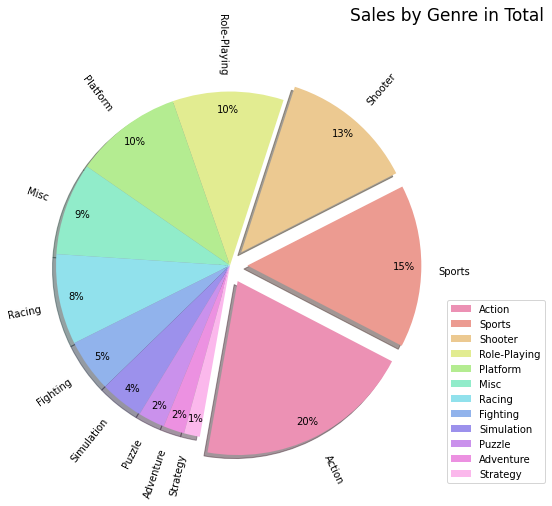

In [84]:
labels = Genre_Sales_Tot_ratio.index
colors = Genre_Tot_color
explode = [0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.figure(figsize = (15,8))
plt.pie(Genre_Sales_Tot_ratio, labels=labels, autopct='%.0f%%', pctdistance=0.9, shadow=True, colors = colors, rotatelabels=True, startangle=260, counterclock=True, explode=explode)
plt.title('Sales by Genre in Total', size = 17, position=(1, 1.0+0.05))
plt.legend(loc=(1.0, 0.0))
plt.show()


상위 3그룹인 액션, 스포츠, 슈팅 장르는 기타지역 총 판매량의 48%를 차지하고 있음.


<결론>

1. 세계적으로 액션, 스포츠, 슈팅 장르가 인기를 끌고 있음을 볼 수 있고, 이는 북미와 유럽, 기타지역도 같은 결과를 나타내고 있음.
2. 유일하게 일본 지역만 선호하는 게임 장르가 판이하게 다른 것을 확인할 수 있는데, 일본의 경우 롤플레잉 장르가 뚜렷한 두각을 나타내고 있음.
3. 따라서 우리 회사는 차기 개발 게임 장르를 액션, 스포츠, 슈팅 중에서 정하는 것이 좋을 것 같다고 판단함.
*※ 대부분의 게임 장르가 복합적이고, 슈팅 장르 자체가 액션게임의 대표적인 세부 장르로 볼 수 있듯이, 차기 개발 게임은 슈팅 특성을 가미한 액션 장르가 좋을 것 같음.*

**2. 연도별 게임의 트렌드가 있을까**

- 앞서 말했듯이, 게임의 출시년도와 관계없이 게임이 재미있다면 사람들은 계속하여 소비함. 따라서 게임의 판매량은 트렌드를 파악하는 데에 큰 의미가 없다고 판단함.
- 하지만 생각을 전환하여, 게임회사는 해당 연도에 잘 팔릴 것 같은 게임을 발매함.  따라서 해당 기간 많이 발매된 게임이 어떤 장르와 플랫폼으로 발매되었는지를 살펴보는 것은 유의미함.
- 이에 더불어 실제 게임 판매량까지 보조데이터로 참고한다면 의미있는 결과를 얻을 수 있을 것으로 보임.

효율적인 분석을 위해, 연도를 10년 단위로 묶어 데이터를 관찰하기로 함\
→ 게임 발매 플랫폼, 장르, 판매량을 정리하여 해당 기간 게임의 트렌드를 확인하기로 함.

In [85]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,.hack//Infection Part 1,PS2,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26
1,.hack//Mutation Part 2,PS2,2002,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.67
2,007 Racing,PS,2000,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53
3,007: Quantum of Solace,PS2,2008,Action,Activision,0.17,0.00,0.00,0.26,0.43
4,007: Quantum of Solace,Wii,2008,Action,Activision,0.30,0.29,0.01,0.07,0.67
...,...,...,...,...,...,...,...,...,...,...
6888,pro evolution soccer 2011,PSP,2010,Sports,Konami Digital Entertainment,0.05,0.30,0.29,0.16,0.80
6889,pro evolution soccer 2011,Wii,2010,Sports,Konami Digital Entertainment,0.08,0.10,0.03,0.02,0.23
6890,pro evolution soccer 2011,PS2,2010,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11,0.41
6891,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.45


우선 연도 뒤에 'Decade'컬럼 생성, 추후 연대 계산해서 값 입력하고자 함.

In [86]:
df.insert(3,'Decade', np.nan)

In [87]:
for i in df.index:
  x = df.loc[i,'Year']
  if x >= 1970 and x < 1980:
    df.loc[i,'Decade'] = 1970
  elif x >= 1980 and x < 1990:
    df.loc[i,'Decade'] = 1980
  elif x >= 1990 and x < 2000:
    df.loc[i,'Decade'] = 1990
  elif x >= 2000 and x < 2010:
    df.loc[i,'Decade'] = 2000
  else:
    df.loc[i,'Decade'] = 2010

In [88]:
df['Decade'] = df['Decade'].astype(int)

In [89]:
df

,Name,Platform,Year,Decade,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,.hack//Infection Part 1,PS2,2002,2000,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26
1,.hack//Mutation Part 2,PS2,2002,2000,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.67
2,007 Racing,PS,2000,2000,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53
3,007: Quantum of Solace,PS2,2008,2000,Action,Activision,0.17,0.00,0.00,0.26,0.43
4,007: Quantum of Solace,Wii,2008,2000,Action,Activision,0.30,0.29,0.01,0.07,0.67
...,...,...,...,...,...,...,...,...,...,...,...
6888,pro evolution soccer 2011,PSP,2010,2010,Sports,Konami Digital Entertainment,0.05,0.30,0.29,0.16,0.80
6889,pro evolution soccer 2011,Wii,2010,2010,Sports,Konami Digital Entertainment,0.08,0.10,0.03,0.02,0.23
6890,pro evolution soccer 2011,PS2,2010,2010,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11,0.41
6891,uDraw Studio,Wii,2010,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.45


연대 값 반영 완료.

이제 각 연대별로 발매된 게임의 Platform, Genre, Publisher를 확인하고, 트렌드를 추측하고자 함. 

**1. 1970**

In [90]:
df[df['Decade'] == 1970]

,Name,Platform,Year,Decade,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
86,Air-Sea Battle,2600,1977,1970,Shooter,Atari,0.91,0.06,0.0,0.01,0.98
828,Combat,2600,1977,1970,Action,Atari,1.17,0.07,0.0,0.01,1.25


1970년대 데이터는 애석하게도 2개뿐이다.\
데이터를 통해 당시 트렌드를 알 수는 없지만, '아타리 2600'이라는 플랫폼은 70년대 당시 게임업계를 지배하던 '아타리'사의 역작으로,\
본 플랫폼을 계기로 '아타리'는 게임산업을 완전히 장악하게 되었다. 데이터의 게임 발매사도 '아타리'임을 확인할 수 있다.

**2. 1980**

In [91]:
df_1980 = df[df['Decade'] == 1980]

In [92]:
from matplotlib import gridspec

In [93]:
pal2 = {'NES': '#EC91B4', '2600': '#EC9B91', 'GB': '#ECC991', 'PC': '#E2EC91'}

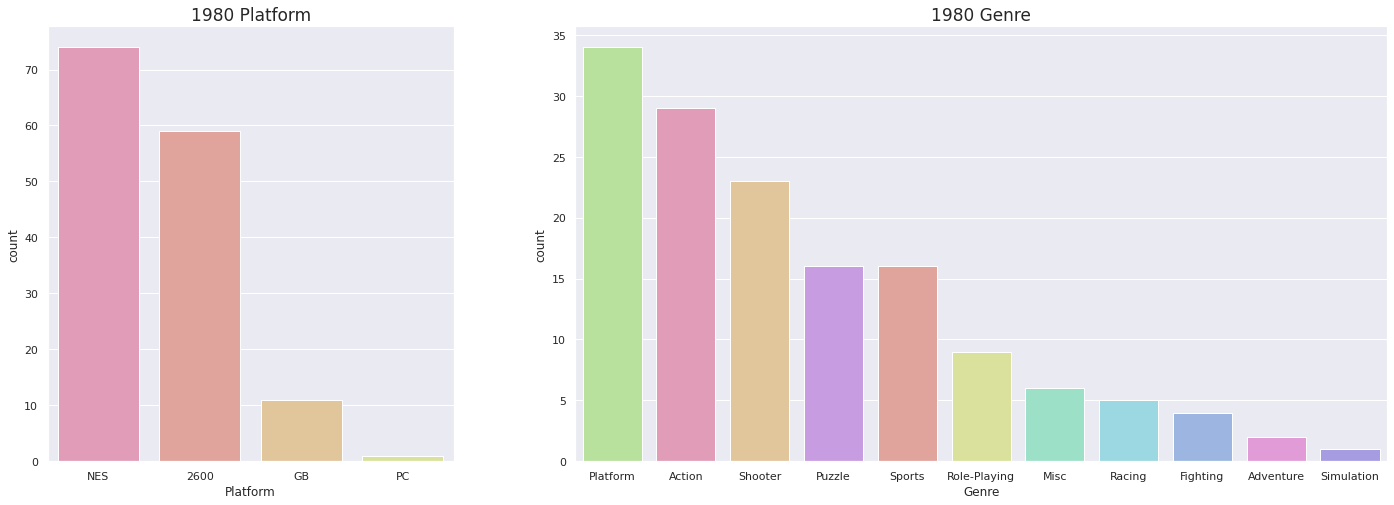

In [94]:
sns.set(rc = {'figure.figsize':(24,8)})
gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.2, width_ratios=[8, 16])

plt.subplot(gs[0])
sns.countplot(data = df_1980, x = 'Platform', palette = pal2)
plt.title('1980 Platform', size = 17)

plt.subplot(gs[1])
order = ['Platform', 'Action', 'Shooter', 'Puzzle', 'Sports', 'Role-Playing', 'Misc', 'Racing', 'Fighting', 'Adventure', 'Simulation'] 
sns.countplot(data = df_1980, x = 'Genre', palette = pal, order = order)
plt.title('1980 Genre', size = 17)
plt.show()

< 플랫폼 >\
1983년부터 1985년까지 일어난 북미 비디오 게임 산업계의 대규모 경기침체 사건인 '아타리 쇼크'를 기점으로,\
1980년대는 아타리를 밀어내고 닌텐도가 게임업계를 장악했음. 전체 판매량에 따른 발매사 목록은 물론이고, 당시 닌텐도에서 출시한 대표 게임기인 'NES'기반 게임 발매가 많은 것을 봐도 알 수 있음.\
'NES'는 닌텐도에서 출시한 카트리지 교환식 8비트 가정용 거치형 게임기로, 
젤다의 전설, 드래곤 퀘스트, 파이널 판타지, 록맨, 메트로이드 등 'NES'에서만의 뛰어난 오리지널 게임들이 나오면서 역사상으로 매우 성공한 게임기들 중 하나가 되었음.\
'아타리 쇼크'로 몰락한 게임업계를 되살린 전설적인 게임기로 평가됨.\
여전히 아타리2600의 비중도 만만찮은 가운데, GB는 닌텐도에서 1989년에 처음 출시한 휴대용 게임기임.

< 장르 >\
가정용 게임기인 'NES'가 대히트를 치면서, 플랫폼 장르의 게임도 성황을 이루게 되는데,\
플랫폼 장르의 대표적인 게임으로 슈퍼마리오, 동키콩 등을 들 수 있다.

In [95]:
import plotly.express as px

In [96]:
df_1980_top = df_1980.sort_values('Total_Sales', ascending = False).reset_index()
df_1980_top = df_1980_top.head(10)

fig = px.sunburst(df_1980_top, path = ['Platform','Genre','Name'], values = 'Total_Sales', title = '1980_top10')
fig.update_layout(uniformtext=dict(minsize=10))
fig.update_layout(margin = dict(t=50, l=0, r=0, b=20))
fig.show()

**3. 1990**

In [97]:
df_1990 = df[df['Decade'] == 1990]

In [98]:
pal3 = {'PS': '#EC91B4', 'N64': '#EC9B91', 'SNES': '#ECC991', 'GB': '#E2EC91',
 'SAT': '#B4EC91', 'PC': '#91ECCA', 'NES': '#91E1EC', 'GEN': '#91B3EC',
 'DC': '#9C91EC', 'SCD': '#CA91EC', 'NG': '#EC91E1'}

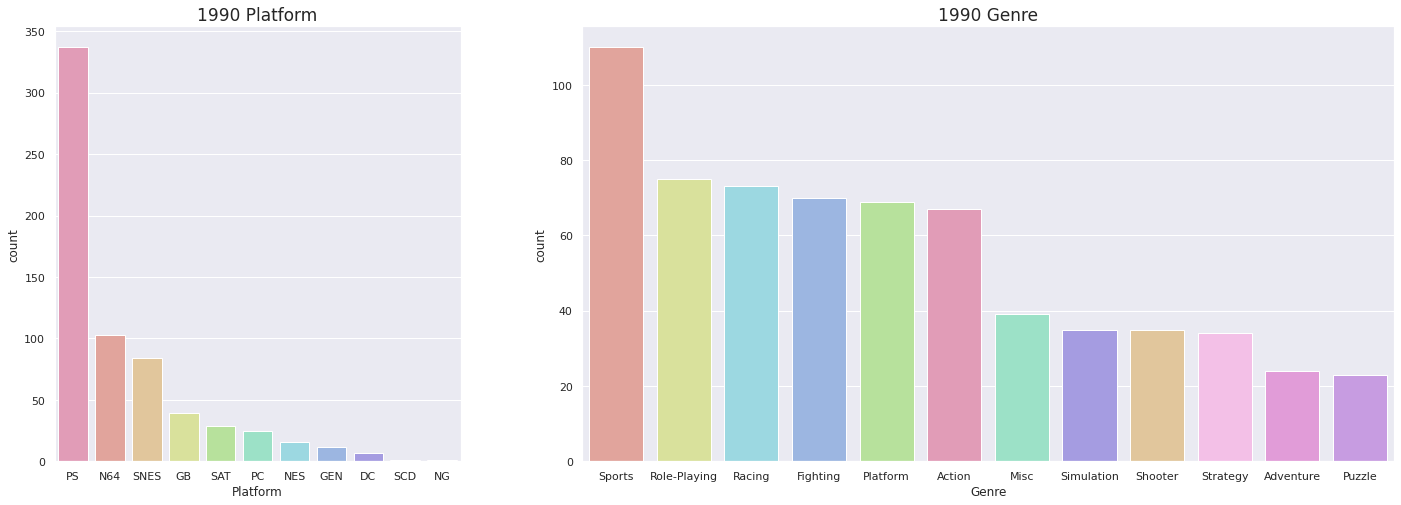

In [99]:
sns.set(rc = {'figure.figsize':(24,8)})
gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.2, width_ratios=[8, 16])

plt.subplot(gs[0])
order = ['PS', 'N64', 'SNES', 'GB', 'SAT', 'PC', 'NES', 'GEN', 'DC', 'SCD', 'NG']
sns.countplot(data = df_1990, x = 'Platform', palette = pal3, order = order)
plt.title('1990 Platform', size = 17)

plt.subplot(gs[1])
order = ['Sports', 'Role-Playing', 'Racing', 'Fighting', 'Platform', 'Action', 'Misc', 'Simulation', 'Shooter', 'Strategy', 'Adventure', 'Puzzle'] 
sns.countplot(data = df_1990, x = 'Genre', palette = pal, order = order)
plt.title('1990 Genre', size = 17)
plt.show()

< 플랫폼 >\
1994년 일본에 처음 출시한 플레이스테이션은 가전회사인 소니가 게임업계에 참여하며 만든 게임기이다. 고가의 업무용 컴퓨터인 워크스테이션에서 가능했던 실시간 3d 렌더링을 가정용 게임기에 적용하였고, 개발사 친화적인 저렴한 로열티와 개발 환경 지원을 통한 서드파티 포섭,\
게임기와 게임 가격 인하가 가능해진 제조와 유통 혁명에 광고계 역사에 남을 특유의 마케팅 수법까지 더해졌던 비디오 게임계 혁신의 총합.\
실제로 당시 경쟁기기였던 닌텐도64와 세가 새턴 등에 비해 월등한 성과를 거두었음.

대표적인 게임으로 그란투리스모, 남코의 철권2, 캡콤의 바이오하자드, 스퀘어사의 파이널 판타지7 등이 있다.

< 장르 >\
게임사에서 스포츠 장르 게임을 가장 많이 발매했다는 사실은 예상 밖의 결과이다. 물론 스포츠 장르는 비디오 게임 초기부터 있어왔고, 가장 인기있는 장르 중에 하나이다.\
태동기에는 하드웨어적 한계로 주로 아무 개성없는 선수 한 명을 조작하면서 플레이하는 게임이 주를 이뤘으나, 하드웨어의 발달로 선수 개개인의 개성을 표현할 수 있게 되었고, 특히 그래픽=현실성 이라는것에 어느정도 일치하기 때문에 차세대 그래픽의 등장과 함께 장르 게임이 많이 발매되었음

In [100]:
df_1990[df_1990['Genre'] == 'Sports'].sort_values('Total_Sales', ascending = False)

,Name,Platform,Year,Decade,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
6266,Tony Hawk's Pro Skater,PS,1999,1990,Sports,Activision,3.42,1.38,0.02,0.20,5.02
2303,Hot Shots Golf,PS,1997,1990,Sports,Sony Computer Entertainment,0.29,0.20,2.13,0.18,2.80
866,Cool Boarders 3,PS,1998,1990,Sports,989 Studios,1.65,0.46,0.10,0.10,2.31
863,Cool Boarders 2,PS,1997,1990,Sports,UEP Systems,1.52,0.46,0.20,0.08,2.26
1090,Derby Stallion,PS,1997,1990,Sports,ASCII Entertainment,0.00,0.00,1.96,0.14,2.10
...,...,...,...,...,...,...,...,...,...,...,...
4453,Pro Yakyuu Team o Tsukurou!,DC,1999,1990,Sports,Sega,0.00,0.00,0.23,0.00,0.23
511,Bottom of the 9th,PS,1996,1990,Sports,Konami Digital Entertainment,0.08,0.05,0.00,0.01,0.14
4896,Sega Bass Fishing,DC,1999,1990,Sports,Sega,0.00,0.00,0.09,0.00,0.09
1091,Derby Stallion,SAT,1999,1990,Sports,ASCII Entertainment,0.00,0.00,0.09,0.00,0.09


In [101]:
df_1990_top = df_1990.sort_values('Total_Sales', ascending = False).reset_index()
df_1990_top = df_1990_top.head(10)

fig = px.sunburst(df_1990_top, path = ['Platform','Genre','Name'], values = 'Total_Sales', title = '1990_top10')
fig.update_layout(uniformtext=dict(minsize=10))
fig.update_layout(margin = dict(t=50, l=0, r=0, b=20))
fig.show()

**4. 2000**

In [102]:
df_2000 = df[df['Decade'] == 2000]

In [103]:
pal4 = {'PS2': '#EC91B4', 'DS': '#EC9B91', 'XB': '#ECC991', 'Wii': '#E2EC91',
 'X360': '#B4EC91', 'GC': '#91ECCA', 'PS3': '#91E1EC', 'GBA': '#91B3EC',
 'PSP': '#9C91EC', 'PC': '#CA91EC', 'PS': '#EC91E1', 'N64': '#FBB8EC', 'GB': '#EC91B4', 'DC': '#EC9B91', 'WS': '#ECC991', '2600': '#E2EC91'}

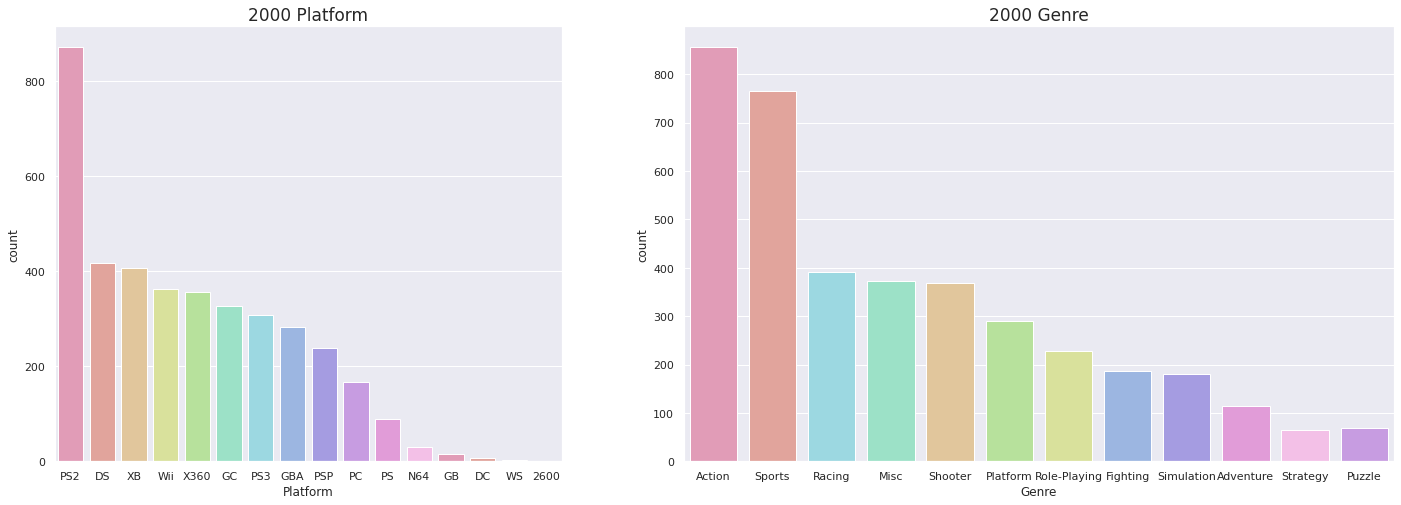

In [104]:
sns.set(rc = {'figure.figsize':(24,8)})
gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.2, width_ratios=[10, 14])

plt.subplot(gs[0])
order = ['PS2', 'DS', 'XB', 'Wii', 'X360', 'GC', 'PS3', 'GBA', 'PSP', 'PC', 'PS', 'N64', 'GB', 'DC', 'WS', '2600']
sns.countplot(data = df_2000, x = 'Platform', palette=pal4, order=order)
plt.title('2000 Platform', size = 17)

plt.subplot(gs[1])
order = ['Action', 'Sports', 'Racing', 'Misc', 'Shooter', 'Platform', 'Role-Playing', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle'] 
sns.countplot(data = df_2000, x = 'Genre', palette = pal, order=order)
plt.title('2000 Genre', size = 17)
plt.show()

< 플랫폼 >\
가히 플레이스테이션의 최전성기를 이끌었다는 평가를 받는 PS2가 여타 플랫폼보다 두각을 나타낸다.\
닌텐도, 세가 등 유수의 뛰어난 게임기기와 경쟁을 벌여야 했던 PS1 시절과 다르게 일찍이 경쟁 상대가 없었으며, 전 세계 수많은 서드파티들이 저마다 쉬지 않고 새로운 게임을 PS2를 통해 발매했다.\
얼마나 압도적이었으면 타 기종 독점작으로 발매된 대작 게임들이 판매량 부진으로 인해 PS2로 역이식되거나 후속작으로 PS2로 멀티 플랫폼 발매를 결정하거나 멀티 플랫폼이라도 PS2로 선행 발매될 정도였다고 한다.

(3번째를 차지한 마이크로소프트의 XB의 경우, 아직 게임시장의 신참이었다고 함.)

< 장르 >\
1990년대 스포츠 장르처럼 게임기기의 발전과 함께 가장 수혜를 많이 받은 장르가 액션이 아닐까 한다. 현실감 넘치는 텍스쳐와 환경, 화려한 광원과 그림자효과, 다이내믹한 움직임과 타격감 등이 그래픽과 컴퓨팅 기술의 혁신과 맞물려 효과가 극대화되고 있었고, 저마다 액션 장르를 기반으로 한 게임을 많이 발매했다.\
스포츠 장르는 1990년대부터 꾸준히 인기가 많다. 





In [105]:
df_2000[df_2000['Genre'] == 'Action'].sort_values('Total_Sales', ascending = False)

,Name,Platform,Year,Decade,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2081,Grand Theft Auto: San Andreas,PS2,2004,2000,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
2085,Grand Theft Auto: Vice City,PS2,2002,2000,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
2067,Grand Theft Auto III,PS2,2001,2000,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
4335,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,2000,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
2070,Grand Theft Auto IV,X360,2008,2000,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.03
...,...,...,...,...,...,...,...,...,...,...,...
2790,LEGO Star Wars: The Video Game,PC,2005,2000,Action,Eidos Interactive,0.00,0.01,0.00,0.00,0.01
2985,Madagascar: Escape 2 Africa,PC,2008,2000,Action,Activision,0.01,0.00,0.00,0.00,0.01
5253,Spider-Man: Friend or Foe,PC,2007,2000,Action,Activision,0.01,0.00,0.00,0.00,0.01
2195,Harry Potter and the Chamber of Secrets,PC,2002,2000,Action,Electronic Arts,0.00,0.01,0.00,0.00,0.01


In [106]:
df_2000_top = df_2000.sort_values('Total_Sales', ascending = False).reset_index()
df_2000_top = df_2000_top.head(10)

fig = px.sunburst(df_2000_top, path = ['Platform','Genre','Name'], values = 'Total_Sales', title = '2000_top10')
fig.update_layout(uniformtext=dict(minsize=10))
fig.update_layout(margin = dict(t=50, l=0, r=0, b=20))
fig.show()

**5. 2010**

In [107]:
df_2010 = df[df['Decade'] == 2010]

In [108]:
df_2010_top = df_2010.sort_values('Total_Sales', ascending = False).reset_index()
df_2010_top.head(10)

,index,Name,Platform,Year,Decade,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2609,Kinect Adventures!,X360,2010,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,2072,Grand Theft Auto V,PS3,2013,2010,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
2,2073,Grand Theft Auto V,X360,2013,2010,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,4328,Pokemon Black/Pokemon White,DS,2010,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
4,689,Call of Duty: Modern Warfare 3,X360,2011,2010,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
5,663,Call of Duty: Black Ops,X360,2010,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
6,4353,Pokemon X/Pokemon Y,3DS,2013,2010,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
7,668,Call of Duty: Black Ops 3,PS4,2015,2010,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
8,673,Call of Duty: Black Ops II,PS3,2012,2010,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
9,674,Call of Duty: Black Ops II,X360,2012,2010,Shooter,Activision,8.25,4.30,0.07,1.12,13.74


In [109]:
pal5 = {'PS3': '#EC91B4', 'X360': '#EC9B91', 'PC': '#ECC991', 'Wii': '#E2EC91',
 'PS4': '#B4EC91', '3DS': '#91ECCA', 'XOne': '#91E1EC', 'DS': '#91B3EC',
 'PSV': '#9C91EC', 'WiiU': '#CA91EC', 'PSP': '#EC91E1', 'PS2': '#FBB8EC'}

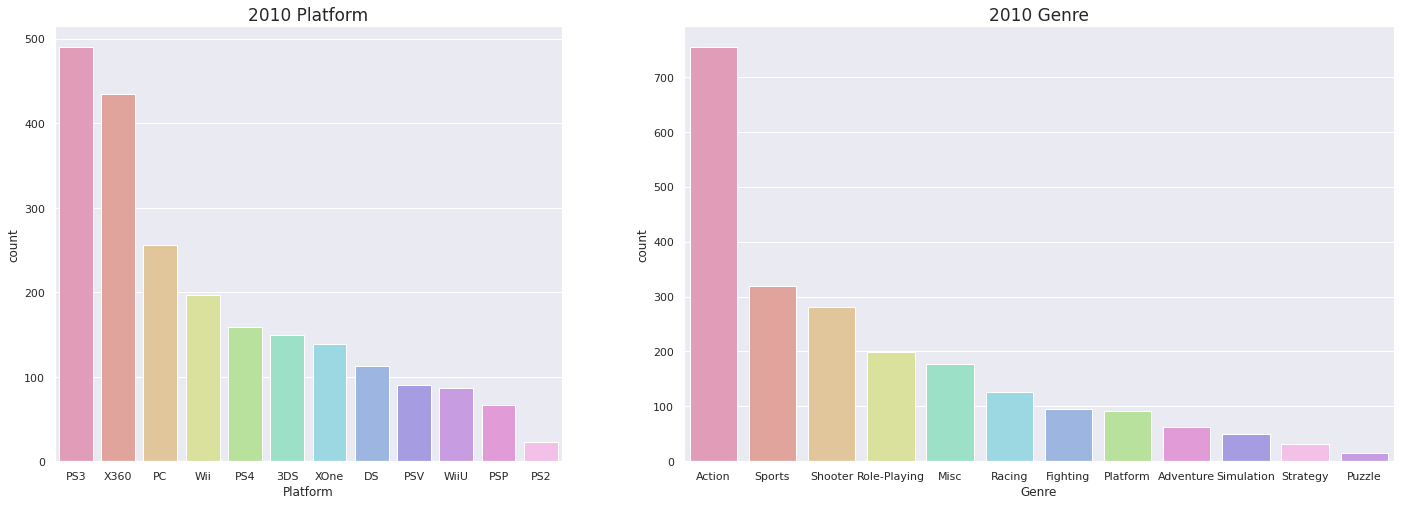

In [110]:
sns.set(rc = {'figure.figsize':(24,8)})
gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.2, width_ratios=[10, 14])

plt.subplot(gs[0])
order = ['PS3', 'X360', 'PC', 'Wii', 'PS4', '3DS', 'XOne', 'DS', 'PSV', 'WiiU', 'PSP', 'PS2']
sns.countplot(data = df_2010, x = 'Platform', palette=pal5, order = order)
plt.title('2010 Platform', size = 17)

plt.subplot(gs[1])
order = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Misc', 'Racing', 'Fighting', 'Platform', 'Adventure', 'Simulation', 'Strategy', 'Puzzle'] 
sns.countplot(data = df_2010, x = 'Genre', palette = pal, order=order)
plt.title('2010 Genre', size = 17)
plt.show()

< 플랫폼 >\
꾸준히 비디오게임기의 강자로 자리매김하고 있는 PS3, 출시 초기 성능 불량 문제로 Wii, X360에게 밀렸었는데,(갑작스러운 설계 변경, 생산 단가 상승, 물량 부족, 개발난이도 상승 등) 2010년 들어 목숨을 건 원가절감 및 공격적인 마케팅, 독점작/퍼스트 파티 타이틀 강화정책 등으로 마침내 X360판매량을 넘어섰다.\
이 시기 인터넷 글이나 유튜브 영상을 보면 PS3와 X360을 비교하고 대조하는 내용이 많은 만큼, PS3와 X360은 영혼의 라이벌 관계였다고 볼 수 있다.\
한 편, PC의 그래픽과 연산 성능이 많이 발전한 탓인지 퍼스트 파티가 아닌 서드 파티들이 주요 게임을 PC로 크로스 플랫폼 발매하는 경우도 이전에 비해 훨씬 많아졌다.



< 장르 >\
액션, 스포츠 장르와 더불어 슈팅 장르의 게임이 많이 출시되었다. 게임 기술의 혁신으로 그래픽, 타격감 등 주요 게임 요소들이 점점 고도화 되었고, 더불어 P2P방식의 게임이 각광을 받으면서 밀리터리나 SF 기반 FPS 게임들이 점점 자리를 잡았다.





In [111]:
df_2010_top = df_2010.sort_values('Total_Sales', ascending = False).reset_index()
df_2010_top = df_2010_top.head(10)

fig = px.sunburst(df_2010_top, path = ['Platform','Genre','Name'], values = 'Total_Sales', title = '2010_top10')
fig.update_layout(uniformtext=dict(minsize=10))
fig.update_layout(margin = dict(t=50, l=0, r=0, b=20))
fig.show()

다음으로, 게임 플랫폼 산업이 독점의 형태에서 점점 크로스플랫폼으로 변화하는 것을 확인하고자 함.

In [112]:
df_1980_flat = df_1980.groupby('Name')['Platform'].value_counts(ascending=False).to_frame()
df_1980_flat

,,Platform
Name,Platform,
1942,NES,1
4 Nin uchi Mahjong,NES,1
Action Force,2600,1
Adventure,2600,1
Adventure Island,NES,1
...,...,...
X-Man,2600,1
Xevious,NES,1
Yakuman,GB,1


In [113]:
df_1990_flat = df_1990.groupby('Name')['Platform'].value_counts(ascending=False).to_frame()
df_1990_flat

Platform
Name                                          Platform          
007: Tomorrow Never Dies                      PS               1
1080°: TenEighty Snowboarding                 N64              1
2Xtreme                                       PS               1
3Xtreme                                       PS               1
A Bug's Life                                  N64              1
...                                                          ...
You Don't Know Jack                           PC               1
                                              PS               1
Yu-Gi-Oh! Duel Monsters                       GB               1
Yu-Gi-Oh! Duel Monsters II: Dark Duel Stories GB               1
Yu-Gi-Oh! Forbidden Memories                  PS               1

[654 rows x 1 columns]

In [114]:
df_2000_flat = df_2000.groupby('Name')['Platform'].value_counts(ascending=True).to_frame()
df_2000_flat.head(20)

Platform
Name                                               Platform          
.hack//Infection Part 1                            PS2              1
.hack//Mutation Part 2                             PS2              1
007 Racing                                         PS               1
007: Quantum of Solace                             DS               1
                                                   PC               1
                                                   PS2              1
                                                   PS3              1
                                                   Wii              1
                                                   X360             1
007: The World is not Enough                       N64              1
                                                   PS               1
100 All-Time Favorites                             DS               1
100 Classic Books                                  DS               1
18 Wheeler: American Pro Trucker                   GC               1
                                                   PS2              1
2 Games in 1 Double Pack: The Incredibles / Fin... GBA              1
2 Games in 1: Disney Princess & The Lion King      GBA              1
2 Games in 1: Sonic Advance & ChuChu Rocket!       GBA              1
2 Games in 1: Sonic Battle & ChuChu Rocket!        GBA              1
2 in 1 Combo Pack: Sonic Heroes / Super Monkey ... XB               1

In [115]:
df_2010_flat = df_2010.groupby('Name')['Platform'].value_counts(ascending=True).to_frame()
df_2010_flat.head(20)

Platform
Name                                               Platform          
2 in 1 Combo Pack: Sonic Heroes / Super Monkey ... X360             1
2010 FIFA World Cup South Africa                   PS3              1
                                                   PSP              1
                                                   Wii              1
                                                   X360             1
2014 FIFA World Cup Brazil                         PS3              1
                                                   X360             1
50 Classic Games                                   3DS              1
ABBA: You Can Dance                                Wii              1
Ace Combat: Assault Horizon                        PS3              1
                                                   X360             1
Alan Wake                                          PC               1
                                                   X360             1
Alice in Wonderland                                DS               1
                                                   Wii              1
Alice: Madness Returns                             PC               1
                                                   PS3              1
                                                   X360             1
Alien: Isolation                                   PC               1
                                                   PS3              1

<결론>
1. 본 데이터로는 당시의 트렌드를 정확히 파악하기는 어려우나, 분석결과는 대체적으로 게임 역사의 맥을 훑는 양상을 보인다.
2. 독점으로 시작된 게임 플랫폼의 흐름이 점차 흥행을 위해 시작된 크로스플랫폼 형식으로 이어졌다.
3. 차기 출시할 게임은 크로스 플랫폼으로 / 액션, 스포츠, 슈팅
*(독점작 계약을 통해 투자를 받거나 이를 통해 흥행을 기록할 대작이 아닌 게임이라면 최대한 많이 파는 것이 유리하다.)*

**3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스** 

게임 플랫폼과 무관하게 총 판매량 100만장 이상 달성한 밀리언 셀러들의 데이터를 시각화하고자 함\
→ 밀리언 셀러 전체 데이터와 함께, 총 판매량 기준 top20의 게임 데이터를 별도로 준비하여 함께 살펴볼 예정.


In [116]:
df1 = df.copy()
df1.head()

,Name,Platform,Year,Decade,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,.hack//Infection Part 1,PS2,2002,2000,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26
1,.hack//Mutation Part 2,PS2,2002,2000,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.67
2,007 Racing,PS,2000,2000,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53
3,007: Quantum of Solace,PS2,2008,2000,Action,Activision,0.17,0.00,0.00,0.26,0.43
4,007: Quantum of Solace,Wii,2008,2000,Action,Activision,0.30,0.29,0.01,0.07,0.67


In [117]:
df_mil = df.groupby('Name').sum()['Total_Sales'].to_frame()
df_mil_list = df_mil[df_mil['Total_Sales'] >= 1].index.tolist()

In [118]:
for x in df.index:
  if df1.loc[x, 'Name'] in df_mil_list:
    pass
  else:
    df1.drop(index=x, axis=0, errors='ignore', inplace=True)

In [119]:
df1_mil = df1.groupby('Name').sum()['Total_Sales'].to_frame()
df1_mil[df1_mil['Total_Sales'] < 1] #밀리언 셀러인 게임 데이터만 불러온 것을 확인

,Total_Sales
Name,


In [120]:
df1 #밀리언 셀러인 게임 데이터 전체

,Name,Platform,Year,Decade,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,.hack//Infection Part 1,PS2,2002,2000,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26
3,007: Quantum of Solace,PS2,2008,2000,Action,Activision,0.17,0.00,0.00,0.26,0.43
4,007: Quantum of Solace,Wii,2008,2000,Action,Activision,0.30,0.29,0.01,0.07,0.67
5,007: Quantum of Solace,PS3,2008,2000,Action,Activision,0.43,0.52,0.02,0.20,1.17
6,007: Quantum of Solace,PC,2008,2000,Action,Activision,0.01,0.01,0.00,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...,...
6888,pro evolution soccer 2011,PSP,2010,2010,Sports,Konami Digital Entertainment,0.05,0.30,0.29,0.16,0.80
6889,pro evolution soccer 2011,Wii,2010,2010,Sports,Konami Digital Entertainment,0.08,0.10,0.03,0.02,0.23
6890,pro evolution soccer 2011,PS2,2010,2010,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11,0.41
6891,uDraw Studio,Wii,2010,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.45


In [121]:
df_mil20_list = df_mil.sort_values('Total_Sales', ascending = False).head(20).index.tolist()

In [122]:
df_top20 = df1.copy()

In [123]:
for x in df_top20.index:
  if df_top20.loc[x, 'Name'] in df_mil20_list:
    pass
  else:
    df_top20.drop(index=x, axis=0, errors='ignore', inplace=True)

In [124]:
df_top20

,Name,Platform,Year,Decade,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
663,Call of Duty: Black Ops,X360,2010,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
664,Call of Duty: Black Ops,Wii,2010,2010,Shooter,Activision,0.82,0.47,0.00,0.12,1.41
665,Call of Duty: Black Ops,PS3,2010,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
666,Call of Duty: Black Ops,DS,2010,2010,Shooter,Activision,0.54,0.05,0.00,0.04,0.63
667,Call of Duty: Black Ops,PC,2010,2010,Shooter,Activision,0.58,0.81,0.00,0.24,1.63
668,Call of Duty: Black Ops 3,PS4,2015,2010,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
669,Call of Duty: Black Ops 3,PC,2015,2010,Shooter,Activision,0.00,0.22,0.00,0.01,0.23
670,Call of Duty: Black Ops 3,X360,2015,2010,Shooter,Activision,1.11,0.48,0.00,0.16,1.75
671,Call of Duty: Black Ops 3,PS3,2015,2010,Shooter,Activision,0.49,0.96,0.07,0.27,1.79
672,Call of Duty: Black Ops 3,XOne,2015,2010,Shooter,Activision,4.52,2.09,0.01,0.67,7.29


**1. 플랫폼**

밀리언 셀러 게임들의 플랫폼을 확인.\
→ 전체 데이터 중에서 각 플랫폼 별 비중을 확인하도록 함.\
→ 데이터 내 플랫폼 종류가 많을 것이고, 크로스 플랫폼이 트렌드기 때문에, 분석 결과 큰 의미가 없을 것으로 보임. 

In [125]:
color = ['#EC91B4', '#EC9B91', '#ECC991', '#E2EC91', '#B4EC91', '#91ECCA', '#91E1EC', '#91B3EC', '#9C91EC', '#CA91EC', '#EC91E1', '#FBB8EC']

In [126]:
mil_platform = df1.Platform.value_counts()
mil_platform_sum = mil_platform.sum()
mil_platform_ratio = mil_platform / mil_platform_sum
mil_platform_ratio = mil_platform_ratio.sort_values(ascending = False)

In [127]:
top20_platform = df_top20.Platform.value_counts()
top20_platform_sum = top20_platform.sum()
top20_platform_ratio = top20_platform / top20_platform_sum
top20_platform_ratio = top20_platform_ratio.sort_values(ascending = False)

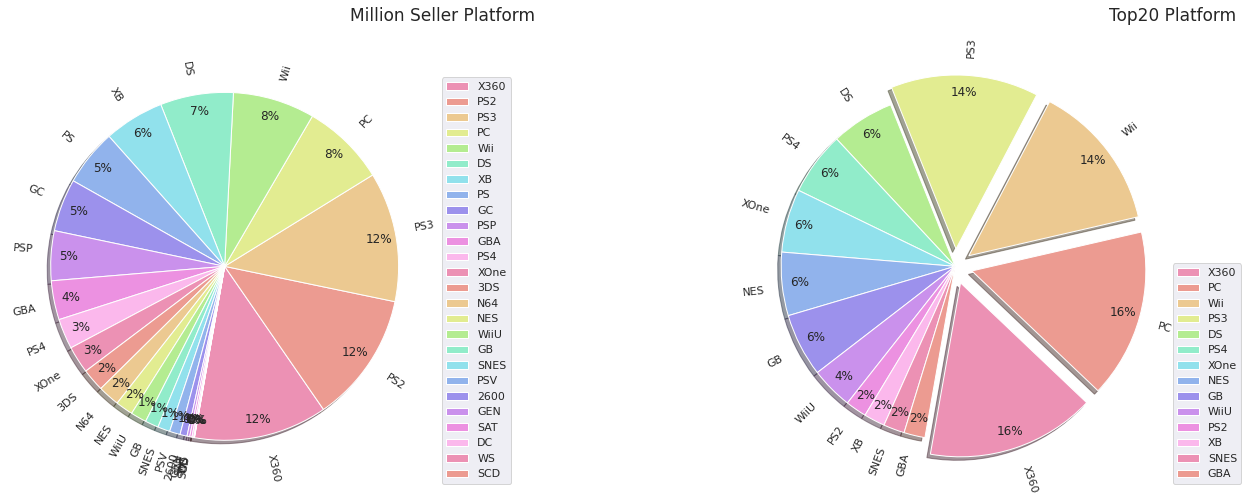

In [128]:
labels = mil_platform.index
plt.subplot(121)
plt.pie(mil_platform_ratio, labels=labels, autopct='%.0f%%', pctdistance=0.9, shadow=True, rotatelabels='true', startangle=260, counterclock=True, colors=color)
plt.title('Million Seller Platform', size = 17, position=(1, 1.0+0.05))
plt.legend(loc=(1.0, 0.0))

labels2 = top20_platform_ratio.index
explode = [0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.subplot(122)
plt.pie(top20_platform_ratio, labels=labels2, autopct='%.0f%%', pctdistance=0.9, shadow=True, rotatelabels='true', startangle=260, counterclock=True, colors=color, explode=explode)
plt.title('Top20 Platform', size = 17, position=(1, 1.0+0.05))
plt.legend(loc=(1.0, 0.0))

plt.show()

1. 데이터의 자료는 2016년까지 취합된 것으로, 최신 기종에 대한 데이터가 없음.
2. 밀리언셀러 데이터는 크로스 플랫폼의 영향으로 비중 분포가 드라마틱하지 않음
3. 그럼에도 Top20의 자료를 함께 봤을때, 차기 개발할 게임은 MS의 XBOX, 소니의 PS, 그리고 PC 기반으로 준비하는 것이 좋을 것으로 보임.
*※ Wii의 경우 판매량이 2009년을 기점으로 정체되어 10년부터 떨어지기 시작했으며 게임의 발매 수도 급감함*

**2. 장르**

밀리언 셀러 게임들의 장르 확인.\
→ 전체 데이터 중에서 각 장르 별 비중을 확인하도록 함.

In [129]:
mil_genre = df1.Genre.value_counts()
mil_genre_sum = mil_genre.sum()
mil_genre_ratio = mil_genre / mil_genre_sum
mil_genre_ratio = mil_genre_ratio.sort_values(ascending = False)

In [130]:
top20_genre = df_top20.Genre.value_counts()
top20_genre_sum = top20_genre.sum()
top20_genre_ratio = top20_genre / top20_genre_sum
top20_genre_ratio = top20_genre_ratio.sort_values(ascending = False)

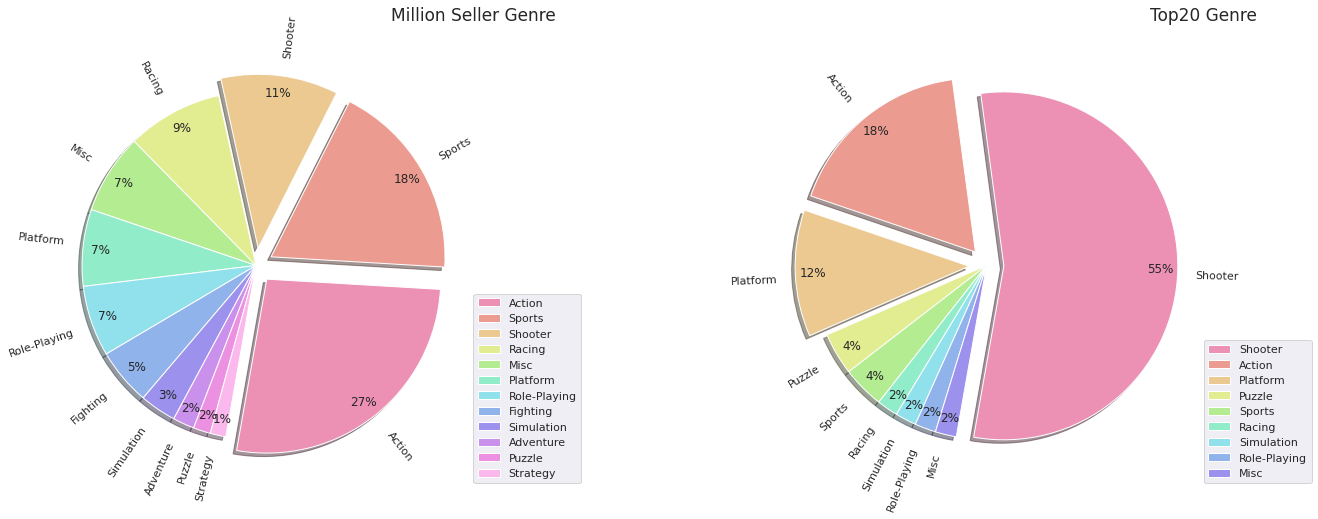

In [131]:
labels = mil_genre.index
explode = [0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.subplot(121)
plt.pie(mil_genre_ratio, labels=labels, autopct='%.0f%%', pctdistance=0.9, shadow=True, rotatelabels='true', startangle=260, counterclock=True, colors=color, explode =explode)
plt.title('Million Seller Genre', size = 17, position=(1, 1.0+0.05))
plt.legend(loc=(1.0, 0.0))

labels2 = top20_genre_ratio.index
explode2 = [0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0]
plt.subplot(122)
plt.pie(top20_genre_ratio, labels=labels2, autopct='%.0f%%', pctdistance=0.9, shadow=True, rotatelabels='true', startangle=260, counterclock=True, colors=color, explode =explode2)
plt.title('Top20 Genre', size = 17, position=(1, 1.0+0.05))
plt.legend(loc=(1.0, 0.0))

plt.show()

1. 밀리언 셀러의 장르 데이터는 앞서 글로벌 시장에서의 장르 선호도와 흡사함을 볼 수 있음.
2. Top20 자료를 보면 슈팅, 액션의 비중이 상당하며, 의외로 플랫폼 장르가 세번째인 것을 볼 수 있음.\
Top20 자료의 플랫폼 장르 게임의 거의 대부분이 '슈퍼마리오'인 것을 볼 때,\
이는 장르 자체의 파워보다 '슈퍼마리오'의 브랜드 파워인 것으로 판단됨.
3. 차기 게임의 경우 액션, 슈팅 장르로 준비하는 것이 좋아 보임.

In [132]:
df_top20.groupby('Name')

In [133]:
df_mil10_list = df_mil.sort_values('Total_Sales', ascending = False).head(10).index.tolist()

In [134]:
df_top10 = df1.copy()

In [135]:
for x in df_top10.index:
  if df_top10.loc[x, 'Name'] in df_mil10_list:
    pass
  else:
    df_top10.drop(index=x, axis=0, errors='ignore', inplace=True)

마지막으로, 본 데이터의 Top10 게임의 데이터를 확인하고자 함.\
플랫폼 무관, 총 판매량 기준으로 추려본 결과, 아래와 같음.

In [136]:
df_top10

,Name,Platform,Year,Decade,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
663,Call of Duty: Black Ops,X360,2010,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
664,Call of Duty: Black Ops,Wii,2010,2010,Shooter,Activision,0.82,0.47,0.00,0.12,1.41
665,Call of Duty: Black Ops,PS3,2010,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
666,Call of Duty: Black Ops,DS,2010,2010,Shooter,Activision,0.54,0.05,0.00,0.04,0.63
667,Call of Duty: Black Ops,PC,2010,2010,Shooter,Activision,0.58,0.81,0.00,0.24,1.63
689,Call of Duty: Modern Warfare 3,X360,2011,2010,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
690,Call of Duty: Modern Warfare 3,Wii,2011,2010,Shooter,Activision,0.60,0.21,0.00,0.08,0.89
691,Call of Duty: Modern Warfare 3,PC,2011,2010,Shooter,Activision,0.41,0.98,0.00,0.33,1.72
692,Call of Duty: Modern Warfare 3,PS3,2011,2010,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
2072,Grand Theft Auto V,PS3,2013,2010,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39


In [137]:
fig = px.sunburst(df_top10, path = ['Genre','Name'], values = 'Total_Sales', title = 'Top10 Games')
fig.update_layout(uniformtext=dict(minsize=10))
fig.update_layout(margin = dict(t=50, l=0, r=0, b=20))
fig.show()

fig = px.sunburst(df_top10, path = ['Name','Platform'], values = 'Total_Sales', title = 'Top10 Games')
fig.update_layout(uniformtext=dict(minsize=10))
fig.update_layout(margin = dict(t=50, l=0, r=0, b=20))
fig.show()

장르와 이름만 확인해보면, 7가지 장르의 10개 게임으로 추려지는 것을 볼 수 있다.\
여기에서, 몇 가지 내용을 상기해보자면

1. Wii의 경우 판매량이 2009년을 기점으로 정체되어 10년부터 떨어지기 시작했으며 게임의 발매 수도 급감함. 따라서 Wii 플랫폼 발매에 중점을 두는 것은 리스크가 있음.
2. 플랫폼과 퍼즐, 롤플레잉 장르의 경우 오랜 시간 꾸준히 사랑받아온 '슈퍼마리오', '테트리스', '포켓몬스터'의 장기집권(?)에 따른 효과가 크다고 판단됨.
3. 슈팅 장르의 '콜오브 듀티', 액션 장르의 'GTA'의 경우, 다른 게임에 비해 비교적 최근에 발매되었으며, PC를 포함한 다양한 최신 기기에 크로스 플랫폼으로 출시하여 
유저들의 접근성이 높음.

따라서, 우리는 액션, 슈팅 장르의 게임을 PS, PC, Xbox 플랫폼에 출시를 하는 것이 좋을 것이라고 판단됨.